# ICS 434: DATA SCIENCE FUNDAMENTALS

## Data Preparation and Cleaning (i.e., Data Wrangling )

---

* Illustrating with a use case


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### About the Data


* The dataset `spending_clean_ex.csv` was specifically constructed from the Medicare dataset
* It was modified to contain interesting cleaning use cases



In [4]:
spending_df = pd.read_csv('data/spending_clean_ex.csv', index_col='unique_id')
spending_df.head(7)

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
BK982218,1750389599,INTERNAL MEDICINE,AZITHROMYCIN,12.0,$77.26
CG916968,1952344418,CARDIOLOGY,SIMVASTATIN,85.0,$767.83
SA964720,1669522744,INTERNAL MEDICINE,INSULIN DETEMIR,14.0,$5409.29
TR390895,1639597115,NaN,LOSARTAN POTASSIUM,11.0,$65.62
JA436080,1073781571,NaN,LAMOTRIGINE,12.0,$8873.7
WO822855,1689080749,INTERVENTIONAL CARDIOLOGY,SERTRALINE HCL,26.0,NaN
PC409862,1568483196,INTERNAL MEDICINE,CLOTRIMAZOLE/BETAMETHASONE DIP,12.0,$310.97


### Inspecting and Modifying Data Types
---

* Recall that `dtypes` returns data type of each column. 

```python
spending_df.dtypes
doctor_id             int64
specialty            object
medication           object
nb_beneficiaries    float64
spending             object
dtype: object
```

* Issues: 
  * `doctor_id` is saved as an `int64`
  * `spending` is saved as an `object`


### Inspecting and Modifying Data Types

* We need to cast the entries of each misidentified column to its appropriate Pandas data type

```python
spending_df['doctor_id'].astype('object')
```

* As is the case with most operations in Pandas, `astype` is not `in-place`
  * We need to manually update the data to make the change permanent by overwriting the column


In [5]:
spending_df['doctor_id'].astype('object')
spending_df.dtypes

doctor_id             int64
specialty            object
medication           object
nb_beneficiaries    float64
spending             object
dtype: object

### Changing Column Data Type



```python
>>> spending_df.loc['doctor_id'] = spending_df.loc['doctor_id'].astype('object')
>>> spending_df.dtypes
doctor_id            object
specialty            object
medication           object
nb_beneficiaries    float64
spending             object
dtype: object
```



In [6]:
spending_df['doctor_id'] = spending_df['doctor_id'].astype('object')

spending_df.dtypes

doctor_id            object
specialty            object
medication           object
nb_beneficiaries    float64
spending             object
dtype: object

### String Methods on Series of Type `Object`

* A series of type `Object` has an accessor that can be used to create a new `str` object of the accessed object
  * ``` spending_df["spending"].str```
 
* The accessor provides various methods that can be applied element-wise on the entries in the `Series `
  * Same methods that are typically on Python String objects
  * Difference is that the methos are applied element-wise; a Series is returned

* String methods are not applied directly to the `Series`, but to the `string` attribute of the Series
 

### String Methods on Series of Type `Object`

* A series of type `Object` has an accessor that can be used to create a new `str` object of the accessed object
  * ``` spending_df["spending"].str```
 
* The accessor provides various methods that can be applied element-wise on the entries in the `Series `
  * Same methods that are typically on Python String objects
  * Difference is that the methos are applied element-wise; a Series is returned


### String Methods on Series of Type `Object`

![](images/str_upper.png)

In [5]:
some_series = pd.Series(["Hi", "There", "how", "are", "you"])
some_series.str.upper()

0       HI
1    THERE
2      HOW
3      ARE
4      YOU
dtype: object

### Using `replace()` to Fix Column's Data

* We need to remove the `"$"` character
 
  * With `replace()`, we can remove `"$"` by replacing it with the `""` (empty string)

* We need to remove the `","` character (ex. 3,454,420.29 should be 3454420.29)
   * With `replace()`, we can remove `","` by replacing it with the `""` (empty string)


```python 
spending_df["spending"].str.replace("$", "")
```

* Since changes are not permanent, we need to overwrite the data in the column



In [6]:
spending_df.sort_values(by="spending").head(10)

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
CQ964168,1174510481,OBSTETRICS/GYNECOLOGY,NYSTATIN/TRIAMCIN,11.0,"$1,219.38"
BU202944,1538156542,FAMILY PRACTICE,ALBUTEROL SULFATE,16.0,"$1,456.08"
RH274400,1023342144,NURSE PRACTITIONER,DICLOFENAC SODIUM,32.0,"$1,491.24"
MK361461,1245206184,CARDIOLOGY,PANTOPRAZOLE SODIUM,102.0,"$1,608.42"
ON964391,1528031978,INTERNAL MEDICINE,FENTANYL,NaN,"$1,730.84"
MG439448,1962498311,OPHTHALMOLOGY,PILOCARPINE HCL,20.0,"$1,910.22"
XI271888,1982785085,INTERNAL MEDICINE,BUDESONIDE/FORMOTEROL FUMARATE,37.0,"$10,253.35"
DJ966828,1629022389,NURSE PRACTITIONER,EZETIMIBE,20.0,"$10,869.06"
SU660670,1366528028,INTERNAL MEDICINE,LISINOPRIL,25.0,$118.89


In [7]:
spending_df["spending"] = spending_df["spending"].str.replace("$", "", regex=True)
spending_df["spending"] = spending_df["spending"].str.replace(",", "", regex=True)
spending_df["spending"] = spending_df["spending"].astype('float64')
spending_df.head()

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
BK982218,1750389599,INTERNAL MEDICINE,AZITHROMYCIN,12.0,77.26
CG916968,1952344418,CARDIOLOGY,SIMVASTATIN,85.0,767.83
SA964720,1669522744,INTERNAL MEDICINE,INSULIN DETEMIR,14.0,5409.29
TR390895,1639597115,NaN,LOSARTAN POTASSIUM,11.0,65.62
JA436080,1073781571,NaN,LAMOTRIGINE,12.0,8873.70


In [8]:
spending_df.dtypes

doctor_id            object
specialty            object
medication           object
nb_beneficiaries    float64
spending            float64
dtype: object

### Combing Multiple String Operations

* We can use method chaining to carry out the operation
  * Combines similar functionality in one line
    * Easier to understand and maintain
* Note that we need to call the '`str`' of each resulting `Series`

```python
>>> spending_df["spending"] = (spending_df["spending"]
                               .str.replace("$", "", regex=True)
                               .str.replace(",", "")
                               .astype("float64"))
```

In [9]:
spending_df = pd.read_csv('data/spending_clean_ex.csv', index_col='unique_id')

spending_df["spending"] = (spending_df["spending"]
                           .str.replace("$", "", regex=True)
                           .str.replace(",", "")
                           .astype("float64"))
spending_df.dtypes

doctor_id             int64
specialty            object
medication           object
nb_beneficiaries    float64
spending            float64
dtype: object

### Question


* Given the `Series` below, which line of code modfies the `Series` so that each entry matches the string: 'UHManoa'?


```python
>>> UH_Series = pd.Series(['U H Manoa',  'UH_Manoa', 'UH Manoa', 'UH-Manoa'])
```

| Index |Data |
|:----------|-----------|
| 0 | U H Manoa |
| 1 | UH_Manoa |
| 2 | UH Manoa |
| 3 | UH-Manoa |





A:
```python
(UH_Series
 .str.replace(" ", "")
 .str.replace("_", "")
 .str.replace("-", ""))
```

B: 
```python
UH_Series
 .str.replace("_", " ")
 .str.replace("-", " ")
```

C:
```python
UH_Series = UH_Series
 .str.replace(" ", "")
 .str.replace("_", "")
 .str.replace("-", "")
```

D:
```python
UH_Series = UH_Series.replace("_", "").replace("-", "").replace(" ", "")
```

In [10]:
UH_Series = pd.Series(['U H Manoa',  'UH_Manoa', 'UH Manoa', 'UH-Manoa'])

# 'replace' does full replacement searches (i.e. the whole item should match), 
# unless you turn on the regex switch. 
# Use regex=True, and it should perform partial replacements as well.

# UH_Series = UH_Series.replace("_", "").replace("-", "").replace(" ", "")
UH_Series = UH_Series.replace("UH_M", "")
print(UH_Series)

UH_Series = UH_Series.replace("UH_M", "", regex=True)
print(UH_Series)

UH_Series = pd.Series(['U H Manoa',  'UH_Manoa', 'UH Manoa', 'UH-Manoa'])
UH_Series = UH_Series.str.replace("_", "").str.replace("-", "").str.replace(" ", "")
print(UH_Series)

UH_Series = pd.Series(['U H Manoa',  'UH_Manoa', 'UH Manoa', 'UH-Manoa'])
UH_Series = UH_Series.str.replace("_", "", regex=True).str.replace("-", "", regex=True).str.replace(" ", "", regex=True)
print(UH_Series)

0    U H Manoa
1     UH_Manoa
2     UH Manoa
3     UH-Manoa
dtype: object
0    U H Manoa
1         anoa
2     UH Manoa
3     UH-Manoa
dtype: object
0    UHManoa
1    UHManoa
2    UHManoa
3    UHManoa
dtype: object
0    UHManoa
1    UHManoa
2    UHManoa
3    UHManoa
dtype: object


### Question


* Given the `Series` below, which line of code modfies the `Series` so that each entry matches the string: 'UHManoa'?


```python
>>> UH_Series = pd.Series(['U H Manoa',  'UH_Manoa', 'UH Manoa', 'UH-Manoa'])
```

A:
```python
(UH_Series
 .str.replace(" ", "")
 .str.replace("_", "")
 .str.replace("-", ""))
```

B: 
```python
UH_Series
 .str.replace("_", " ")
 .str.replace("-", " ")
```

C:
```python
UH_Series = UH_Series
 .str.replace(" ", "")
 .str.replace("_", "")
 .str.replace("-", "")
```

D:
```python
UH_Series = (UH_Series
             .str.replace(" ", "")
             .str.replace("_", "")
             .str.replace("-", ""))
```

In [11]:
UH_Series = pd.Series(['U H Manoa',  'UH_Manoa', 'UH Manoa', 'UH-Manoa'])

# A:
print("A =====")
(UH_Series
 .str.replace(" ", "")
 .str.replace("_", "")
 .str.replace("-", ""))
display(UH_Series)

# #B:
# UH_Series
#   .str.replace("_", " ")
#   .str.replace("-", " ")
      
# #C:
# UH_Series = UH_Series
#  .str.replace(" ", "")
#  .str.replace("_", "")
#  .str.replace("-", "")
      
# D:
print("D =====")
UH_Series = (UH_Series
             .str.replace(" ", "")
             .str.replace("_", "")
             .str.replace("-", ""))
UH_Series

A =====


0    U H Manoa
1     UH_Manoa
2     UH Manoa
3     UH-Manoa
dtype: object

D =====


0    UHManoa
1    UHManoa
2    UHManoa
3    UHManoa
dtype: object

### Missing Data


* Missing data can complicate analysis or lead to erroneous results

* Missing data can arise for various reasons
  * Human error: data deleted by mistake
  * Partial data collection
    * E.g., the first round of data collection did not record a field (ex. salary) while the second round did
  * Defective instrumentation or intermittent communication problems

* Missing values can be indicated using a sentinel
 * E.g., 999999, "UNKNOWN", "N/A", etc.


### Handling Missing Data

* Requires identifying missing values

* Handling missing values is typically done by either: 
  1. Filtering out missing values
  2. Filling in missing values with putative values (imputation)
  

* When to use which is application-specific and data specific
  * Can you afford to throw away data?
  * Is there an easy way to fill in, i.e., impute, missing values?
    * Use default value for instance (ex. mean for that feature if numeric value)
    * Use a statistical model 


### Identifying Missing Values 

Missing value can occur in the data as:
* Empty fields indicating that the value is missing
    * Pandas denotes missing values with `NaN`
        * Automatically set if the value is `empty` in the data file

  * NaN available in `numpy` is represented as a float that is not equal to any other number
    * `np.NaN != np.NaN`
  
  
  
* Sentinel values
  * Sentinels are typically dummy data that is added convenience to identify that a value is missing 
  * Ex. replacing zip code with 999999 or salary with 0 or negative value (ex. -1) 
  


In [12]:
np.nan == np.nan

False

### Identifying Missing Values -- Cont'd

* Identifying missing values is critical for appropriately modeling the data

* Leaving sentinel value in can skew the data
  * Ex. computing mean salary if data contains sentinel value will skew the mean


* Leaving `nan` values can lead to `nan` as a result
  - Ex. replace all the occurrences of 999999 with `np.nan`

In [13]:
x = pd.Series([10, np.NaN, 4])
x

0    10.0
1     NaN
2     4.0
dtype: float64

In [14]:
_sum = sum(x)
_mean = np.mean(x) # did not work in previous versions :(
nanmean = np.nanmean(x)

# different ways of printing  

print("The sum is {}".format(_sum))
print(f"The mean is {_mean}")
print("The nanmean is %s" % (nanmean))

The sum is nan
The mean is 7.0
The nanmean is 7.0


### Identifying Missing Values -- Cont'd


- We can use the `isnull()` or `isna()` methods on a Series or DataFrame to identify missing values
  - The method returns `True` if value is `NaN` and `False` otherwise
  
```python
spending_df.isnull().head()
           doctor_id  specialty  medication  nb_beneficiaries  spending
unique_id                                                              
BK982218       False      False       False             False     False
CG916968       False      False       False             False     False
SA964720       False      False       False             False     False
TR390895       False       True       False             False     False
JA436080       False       True       False             False     False
```

In [15]:
spending_df.head()

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
BK982218,1750389599,INTERNAL MEDICINE,AZITHROMYCIN,12.0,77.26
CG916968,1952344418,CARDIOLOGY,SIMVASTATIN,85.0,767.83
SA964720,1669522744,INTERNAL MEDICINE,INSULIN DETEMIR,14.0,5409.29
TR390895,1639597115,NaN,LOSARTAN POTASSIUM,11.0,65.62
JA436080,1073781571,NaN,LAMOTRIGINE,12.0,8873.70


In [16]:
spending_df.isnull().head()

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
BK982218,False,False,False,False,False
CG916968,False,False,False,False,False
SA964720,False,False,False,False,False
TR390895,False,True,False,False,False
JA436080,False,True,False,False,False


In [17]:
spending_df.isna().head()

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
BK982218,False,False,False,False,False
CG916968,False,False,False,False,False
SA964720,False,False,False,False,False
TR390895,False,True,False,False,False
JA436080,False,True,False,False,False


### Counting Missing Values


* You can count the number of missing values by counting the number of `True` and `False` values 
  * Recall that Python encodes `True` as $1$ and `False` as $0$  
  * Use `sum` to count the number of 0s and 1s


```python
spending_df["spending"].isnull().sum()
```

* You can achieve the same by subtracting the result of `count()` (Returns the number of non-NA/null) method from the result of the `size` attribute (including missing values)

```python
spending_df["spending"].size - spending_df["spending"].count()
```

In [18]:
spending_df['spending'].isnull().sum()

4

In [19]:
spending_df["spending"].size - spending_df["spending"].count()

4

In [20]:
spending_df.isnull().sum()

doctor_id           0
specialty           6
medication          1
nb_beneficiaries    4
spending            4
dtype: int64

In [21]:
spending_df.count()

doctor_id           54
specialty           48
medication          53
nb_beneficiaries    50
spending            50
dtype: int64

### Changing Column Data Type

* Converting as we did earlier can only be done if the data in the column is compatible with the type
 * We mentioned that we cannot convert a column that contains last names into `float64` (number with decimal points)
 * Similarly, we cannot convert a column that contains a NaN to integer (recall that NaN is float)
 * Converting a column that contains a NaN to str results in `NaN` becoming the string `"nan"`

### Changing Column Data Type

* Converting as we did above can only be done if the data in the column is compatible with the type
 * E.g., we cannot convert a column that contains last names into `float64` (number with decimal points)
 * Similarly, we cannot convert a column that contains a NaN to integer (recall that NaN is float)
 * Converting a column that contains a NaN to str results in `NaN` becoming the string `"nan"`


In [22]:
x = pd.DataFrame([[1, "10"], [2, np.NaN], [3, "4"]])
x[1].astype('int')

ValueError: cannot convert float NaN to integer

In [23]:
x = pd.DataFrame([[1, "10"], [2, np.NaN], [3, "4"]])
display(x)

print(x.dtypes)
x[1].astype('float64')

,0,1
0,1,10
1,2,NaN
2,3,4


0     int64
1    object
dtype: object


0    10.0
1     NaN
2     4.0
Name: 1, dtype: float64

In [24]:
x = pd.DataFrame([[1, 10], [2, np.NaN], [3, 4]])
y = x[1].astype('str')

display(y)
print(y[1], type(y[1]))

0    10.0
1     nan
2     4.0
Name: 1, dtype: object

nan <class 'str'>


### Changing Column Data Type

* `nb_beneficiaries` cannot readily be converted to `int64` 

```python
spending_df['nb_beneficiaries'] = spending_df['nb_beneficiaries'].astype('int64')
...
IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer
```

* Pandas cannot convert `NaN` to `int`
    * We need to first handle the missing value before converting

In [25]:
spending_df['nb_beneficiaries'] = spending_df['nb_beneficiaries'].astype('int64')

IntCastingNaNError: Cannot convert non-finite values (NA or inf) to integer

### Filtering Missing Values

* The trivial way to handle missing values is by dropping entries that contain them


* Judgement call as to whether this can bias your analysis
  * For instance, removing 5 instances out of 1M that have missing values should not be a problem
  * However, if all males have salary value missing, removing all males data will bias your market segmentation model
    
* Can be carried out using subsetting or the  `dropna()` method 


### Filtering Missing Values -- Cont'd

* You **can** subset using a `Boolean` `Series`
  * We previously saw how to subset using a list of indices and labels


```python
null_entries = spending_df["spending"].isnull()
not_null_entries = ~ null_entries
spending_no_na_df = spending_df[not_null_entries]
```

#### Or simply

```python
spending_no_na_df = spending_df[~ spending_df["spending"].isnull()]
```

* The index needs to have the same first dimension as the object it is indexing

In [26]:
data = pd.DataFrame({"A":[1, 2, 3, 4, 5, 6], "B":[10, 2, 5, 7, np.NaN, 19]})
data

,A,B
0,1,10.0
1,2,2.0
2,3,5.0
3,4,7.0
4,5,NaN
5,6,19.0


In [27]:
is_null_values = data["B"].isnull()
is_null_values

0    False
1    False
2    False
3    False
4     True
5    False
Name: B, dtype: bool

In [28]:
data[~is_null_values]

,A,B
0,1,10.0
1,2,2.0
2,3,5.0
3,4,7.0
5,6,19.0


In [29]:
some_data = pd.Series([1, 2, 3, 4, 5, 6])
some_data % 2 == 0 

0    False
1     True
2    False
3     True
4    False
5     True
dtype: bool

In [30]:
some_data = pd.Series([1, 2, 3, 4, 5, 6])

is_even = some_data % 2 == 0 

print("is_even")
print(is_even)
print("-----------")
print("~ is_even")
print(~is_even)

is_even
0    False
1     True
2    False
3     True
4    False
5     True
dtype: bool
-----------
~ is_even
0     True
1    False
2     True
3    False
4     True
5    False
dtype: bool


In [31]:
some_data = pd.Series([1, 2, 3, 4, 5, 6])
is_even = some_data % 2 == 0 

some_data[is_even]

1    2
3    4
5    6
dtype: int64

In [32]:
some_data = pd.Series([1, 2, 3, 4, 5, 6])
is_even = some_data % 2 == 0 

some_data[~is_even]

0    1
2    3
4    5
dtype: int64

In [33]:
null_entries = spending_df["spending"].isnull()
not_null_entries = ~ null_entries
spending_no_na_df = spending_df[not_null_entries]

print(spending_df.shape, spending_no_na_df.shape)

(54, 5) (50, 5)


### Filtering `NaN` Using the `dropna()` Method 

* Considers, by default, all the columns
  * Can consider a subset of columns

* The method can be used to drop either rows or columns using `axis`
<img src="images/axis_drop.png" alt="drawing" style="width:500px">

In [34]:
test_df = pd.DataFrame({"X": [1, 2, 3, 4], "Y": ['A', 'E', 'C', np.nan]})
test_df

,X,Y
0,1,A
1,2,E
2,3,C
3,4,NaN


In [35]:
test_df.dropna()

,X,Y
0,1,A
1,2,E
2,3,C


In [36]:
test_df.dropna(axis=1)

,X
0,1
1,2
2,3
3,4


In [37]:
# dropna() is not in-plance operation
test_df

,X,Y
0,1,A
1,2,E
2,3,C
3,4,NaN


In [38]:
# This is when small test cases are useful

test_df.dropna(axis=0, subset=["X"])

,X,Y
0,1,A
1,2,E
2,3,C
3,4,NaN


In [39]:
test_df.dropna(axis=0, subset=["Y"])

,X,Y
0,1,A
1,2,E
2,3,C


### Filling Missing Values

* Filling missing values is often referred to as *missing value imputation*, or simply *imputation*

* When data is scarce, being able to impute missing values is critical

* Two high-level strategies for imputing data: 

    1. Filling the value with a representative constant

    2. Filling the value dynamically
      * How many cars went through the University Ave's H1 exit this Wednesday?
        * Probably close to the same number as last Wednesday
      * What was the temperature reported by a sensor at 2 PM
         * An average of the temperatures at times 1:55 PM and 2:05 PM is probably a good estimate.

* Both approaches can be carried out using `fillna()`

### `fillna()` with Static Values 

* Use a scalar constant to replace all missing values
* Use a dictionary with specific values for each column

```python
>>> filled_spending_df = spending_df.fillna(0)
```


```python
>>> filled_spending_df = spending_df.fillna( {"specialty": "UNKNOWN", 
                              "nb_beneficiaries": 0, 
                              "spending": 0} )
```

### `fillna()` with Dynamically Computed Values

* Dynamic value imputation refers to filling the missing entries with a value that depends on the existing data

* Many different approaches for doing this
  * Ex. replace a value with the column's mean


```python
>>> average_spending = spending_df["spending"].mean()
>>> average_nb_beneficiaries = spending_df["nb_beneficiaries"].mean()
>>> filled_spending_df = spending_df.fillna( {"nb_beneficiaries": average_nb_beneficiaries, 
                      "spending": average_spending} )
```

### `fillna()` with Dynamic Values for Time Series

*  `fillna()` has a `method` parameter that can be modified to either:
  * backward fill, `method='bfill'`
    * Fill a missing value with the non-missing value that comes after it
  * forward fill, `method=ffill`
    * Fill a missing value with the non-missing value that comes before it

* Another strategy is to just average the previous and next values

In [40]:
complete_data = pd.Series([10, 20, 20, 5, 30, 100, 30, 20, 10, 10, 20, 10, 5, 20, 50, 40, 50, 50, 50, 50, 60])
test_df = pd.Series([10, 20, 20, 5, np.NaN, 100, 30, 20, 10, 10, 20, 10, 5, np.NaN, 50, 40, 50, 50, 50, 50, 60])
data = pd.DataFrame({"Complete": complete_data, "test_df":test_df})

data

,Complete,test_df
0,10,10.0
1,20,20.0
2,20,20.0
3,5,5.0
4,30,NaN
5,100,100.0
6,30,30.0
7,20,20.0
8,10,10.0
9,10,10.0


In [41]:
ffilled_data = data.fillna(method='ffill')
ffilled_data

,Complete,test_df
0,10,10.0
1,20,20.0
2,20,20.0
3,5,5.0
4,30,5.0
5,100,100.0
6,30,30.0
7,20,20.0
8,10,10.0
9,10,10.0


In [42]:
bfilled_data = data.fillna(method='bfill')
bfilled_data

,Complete,test_df
0,10,10.0
1,20,20.0
2,20,20.0
3,5,5.0
4,30,100.0
5,100,100.0
6,30,30.0
7,20,20.0
8,10,10.0
9,10,10.0


<AxesSubplot: >

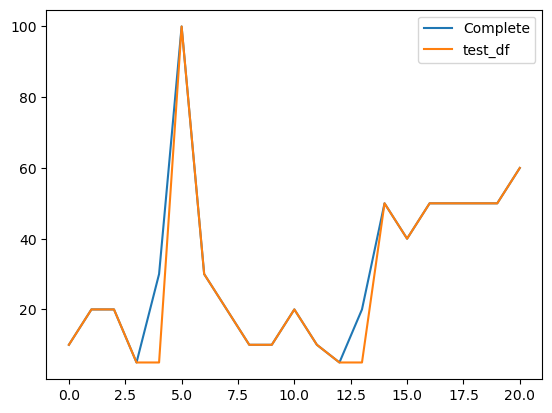

In [43]:
ffilled_data.plot()

<AxesSubplot: >

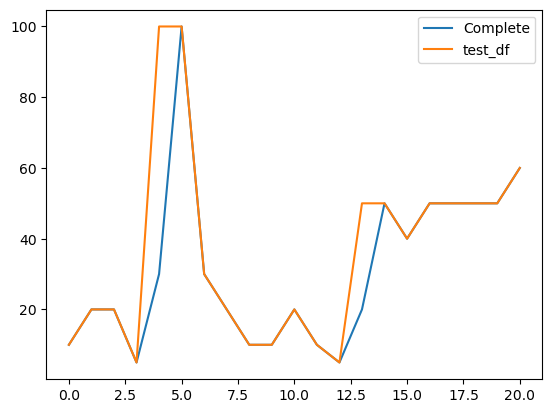

In [44]:
bfilled_data.plot()

### `fillna()` with Dynamic Values -- Cont'd

* Dozens of possible strategies
  * We will see regression as a simple model to impute missing values
  * More sophisticated machine learning models can be used

* When instances (entries) are similar, a good strategy is to just copy value from previous or next instnace
  * Alternaitvely, we can average based on `k-nearest` neighbors

* You can come up with your own model (logic) and apply it using iteratively
  * Part of Assignment 1

### `fillna()` with Dynamic Values -- Cont'd

* Dozens of possible strategies
  * We will see regression as a simple model to impute missing values
  * More sophisticated machine learning models can be used

* When instances (entries) are similar, a good strategy is to just copy value from previous or next instnace
  * Alternaitvely, we can average based on `k-nearest` neighbors

* You can come up with your own model (logic)

In [45]:
### Skip this
t = pd.Series([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11])

def is_even(x):
    return x%2 == 0 
    
    
s = t.where(is_even, -1)
s

0     -1
1      2
2     -1
3      4
4     -1
5      6
6     -1
7      8
8     -1
9     10
10    -1
dtype: int64

In [46]:
spending_df

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
BK982218,1750389599,INTERNAL MEDICINE,AZITHROMYCIN,12.0,77.26
CG916968,1952344418,CARDIOLOGY,SIMVASTATIN,85.0,767.83
SA964720,1669522744,INTERNAL MEDICINE,INSULIN DETEMIR,14.0,5409.29
TR390895,1639597115,NaN,LOSARTAN POTASSIUM,11.0,65.62
JA436080,1073781571,NaN,LAMOTRIGINE,12.0,8873.70
WO822855,1689080749,INTERVENTIONAL CARDIOLOGY,SERTRALINE HCL,26.0,NaN
PC409862,1568483196,INTERNAL MEDICINE,CLOTRIMAZOLE/BETAMETHASONE DIP,12.0,310.97
CG865025,1497955603,CARDIOLOGY,ATORVASTATIN CALCIUM,82.0,2726.72
XI271888,1982785085,INTERNAL MEDICINE,BUDESONIDE/FORMOTEROL FUMARATE,37.0,10253.35


In [47]:
filled_spending_df = spending_df.fillna(0)
filled_spending_df

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
BK982218,1750389599,INTERNAL MEDICINE,AZITHROMYCIN,12.0,77.26
CG916968,1952344418,CARDIOLOGY,SIMVASTATIN,85.0,767.83
SA964720,1669522744,INTERNAL MEDICINE,INSULIN DETEMIR,14.0,5409.29
TR390895,1639597115,0,LOSARTAN POTASSIUM,11.0,65.62
JA436080,1073781571,0,LAMOTRIGINE,12.0,8873.70
WO822855,1689080749,INTERVENTIONAL CARDIOLOGY,SERTRALINE HCL,26.0,0.00
PC409862,1568483196,INTERNAL MEDICINE,CLOTRIMAZOLE/BETAMETHASONE DIP,12.0,310.97
CG865025,1497955603,CARDIOLOGY,ATORVASTATIN CALCIUM,82.0,2726.72
XI271888,1982785085,INTERNAL MEDICINE,BUDESONIDE/FORMOTEROL FUMARATE,37.0,10253.35


In [48]:
filled_spending_df = spending_df.fillna( { "specialty": "UNKNOWN", 
                                          "nb_beneficiaries": 0, 
                                          "spending": 0 } )
filled_spending_df

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
BK982218,1750389599,INTERNAL MEDICINE,AZITHROMYCIN,12.0,77.26
CG916968,1952344418,CARDIOLOGY,SIMVASTATIN,85.0,767.83
SA964720,1669522744,INTERNAL MEDICINE,INSULIN DETEMIR,14.0,5409.29
TR390895,1639597115,UNKNOWN,LOSARTAN POTASSIUM,11.0,65.62
JA436080,1073781571,UNKNOWN,LAMOTRIGINE,12.0,8873.70
WO822855,1689080749,INTERVENTIONAL CARDIOLOGY,SERTRALINE HCL,26.0,0.00
PC409862,1568483196,INTERNAL MEDICINE,CLOTRIMAZOLE/BETAMETHASONE DIP,12.0,310.97
CG865025,1497955603,CARDIOLOGY,ATORVASTATIN CALCIUM,82.0,2726.72
XI271888,1982785085,INTERNAL MEDICINE,BUDESONIDE/FORMOTEROL FUMARATE,37.0,10253.35


In [49]:
average_spending = spending_df["spending"].mean()
average_nb_beneficiaries = spending_df["nb_beneficiaries"].mean()
filled_spending_df = spending_df.fillna({"nb_beneficiaries": average_nb_beneficiaries , 
                                         "spending": average_spending})
filled_spending_df

,doctor_id,specialty,medication,nb_beneficiaries,spending
unique_id,,,,,
BK982218,1750389599,INTERNAL MEDICINE,AZITHROMYCIN,12.0,77.260
CG916968,1952344418,CARDIOLOGY,SIMVASTATIN,85.0,767.830
SA964720,1669522744,INTERNAL MEDICINE,INSULIN DETEMIR,14.0,5409.290
TR390895,1639597115,NaN,LOSARTAN POTASSIUM,11.0,65.620
JA436080,1073781571,NaN,LAMOTRIGINE,12.0,8873.700
WO822855,1689080749,INTERVENTIONAL CARDIOLOGY,SERTRALINE HCL,26.0,5806.981
PC409862,1568483196,INTERNAL MEDICINE,CLOTRIMAZOLE/BETAMETHASONE DIP,12.0,310.970
CG865025,1497955603,CARDIOLOGY,ATORVASTATIN CALCIUM,82.0,2726.720
XI271888,1982785085,INTERNAL MEDICINE,BUDESONIDE/FORMOTEROL FUMARATE,37.0,10253.350
